In [76]:
%pip install SciencePlots
from functools import reduce
from statistics import mean, stdev, mode, quantiles
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])

import re
import pandas as pd
from os import walk
import numpy as np
import matplotlib
import os

Note: you may need to restart the kernel to use updated packages.


In [77]:
# /usr/bin/env TS_NODE_PROJECT=tsconfig.json 'OFF-HFC_LOGGING={"debug":"console","info":"console"}' 'NODE_OPTIONS=--require /home/rafaelapb/.vscode-server-insiders/bin/4589815e4849499c67125ff68563fa102646b869/extensions/ms-vscode.js-debug/src/bootloader.bundle.js --inspect-publish-uid=http' 'VSCODE_INSPECTOR_OPTIONS={"inspectorIpc":"/tmp/node-cdp.33739-1.sock","deferredMode":false,"waitForDebugger":"","execPath":"/home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node","onlyEntrypoint":false,"autoAttachMode":"always","mandatePortTracking":true,"fileCallback":"/tmp/node-debug-callback-10ce8a101bff4e7a"}' /home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node --require ts-node/register --async-stack-traces packages/cactus-plugin-cc-tx-visualization/src/test/typescript/integration/cctxviz-persist-cross-chain-log.test.ts > packages/cactus-plugin-cc-tx-visualization/src/test/typescript/csv/out.txt
path = os.getcwd()
parent = os.path.dirname(path)
print(parent)
test_result_path = parent + "/test-results/"
NUMBER_TESTS = 30

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(test_result_path)




def get_all_files(path):
    filenames = []
    for _, _, filenames in sorted(walk(path)):
        break
    #regex all out: .*\.out
    # for dummy use case: (.)*-dummy-\d.out
    filenames = [i for i in filenames if re.match("(.)*-dummy-\d+.out", i)]
    return filenames


/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main
['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"5c7650e0-964b-4726-82d7-6950ecefee7e"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-370191kP4xNTi6to4.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/test-results/


In [82]:
def exists (element):
    if (element):
        return True
    else:
        return False
            
            # Load out file and puts variables in dict
files = get_all_files(test_result_path)
print(f"found {len(files)} matches")
metric_dict = dict()

for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict.get(key):
            metric_dict[key].append(value)
        else: 
            metric_dict[key] = [value]

#print("the metric dictionary is")
print(metric_dict)
reduced_metric_dict = dict()
#print(metric_dict.values())
#reduced_metric_dict = reduce(lambda x, list: x + mean(list), metric_dict.values(),0)       

for element in metric_dict:
    data_container = {
        "label": element,
        "mean": round(mean(map(lambda x: float(x), metric_dict[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict[element])),
    }
    reduced_metric_dict[element] = data_container
print(reduced_metric_dict)



    



found 60 matches
{'EVAL-testFile-SETUP-INFRA': ['1345', '1371', '1348', '1352', '1376', '1340', '1364', '1372', '1336', '1371', '1345', '1371', '1351', '1364', '1371', '1377', '1457', '1389', '1385', '1413', '1364', '1359', '1353', '1360', '1402', '1398', '1342', '1347', '1381', '1387'], 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': ['2', '1', '2', '1', '1', '1', '1', '2', '1', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2', '2', '1', '2', '2', '2', '1', '1', '2', '1', '1', '1'], 'EVAL-testFile-POLL': ['3018', '3019', '3018', '3018', '3017', '3023', '3018', '3017', '3019', '3020', '3019', '3018', '3018', '3027', '3021', '3019', '3019', '3020', '3019', '3019', '3019', '3021', '3019', '3018', '3019', '3019', '3019', '3023', '3019', '3017'], 'EVAL-testFile-SEND-MESSAGES': ['0', '2', '2', '1', '1', '1', '3', '1', '3', '1', '2', '2', '1', '2', '1', '0', '2', '2', '2', '1', '2', '1', '1', '2', '1', '2', '2', '1', '2', '0'], 'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': ['1', '0',

In [ ]:
mapper = {
    'EVAL-SETUP-EVENT-COLLECTOR': 'Setup event collector', 
    'EVAL-SETUP-INIT': 'Initialize Hephaestus', 
    'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': 'Create events', 
    'EVAL-plugin-cc-tx-visualization-PERSIST-LOG':'Persist cross-chain log',
    'EVAL-ccModel-DUMMY': 'Create Cross-Chain Model'
}



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyError: 0

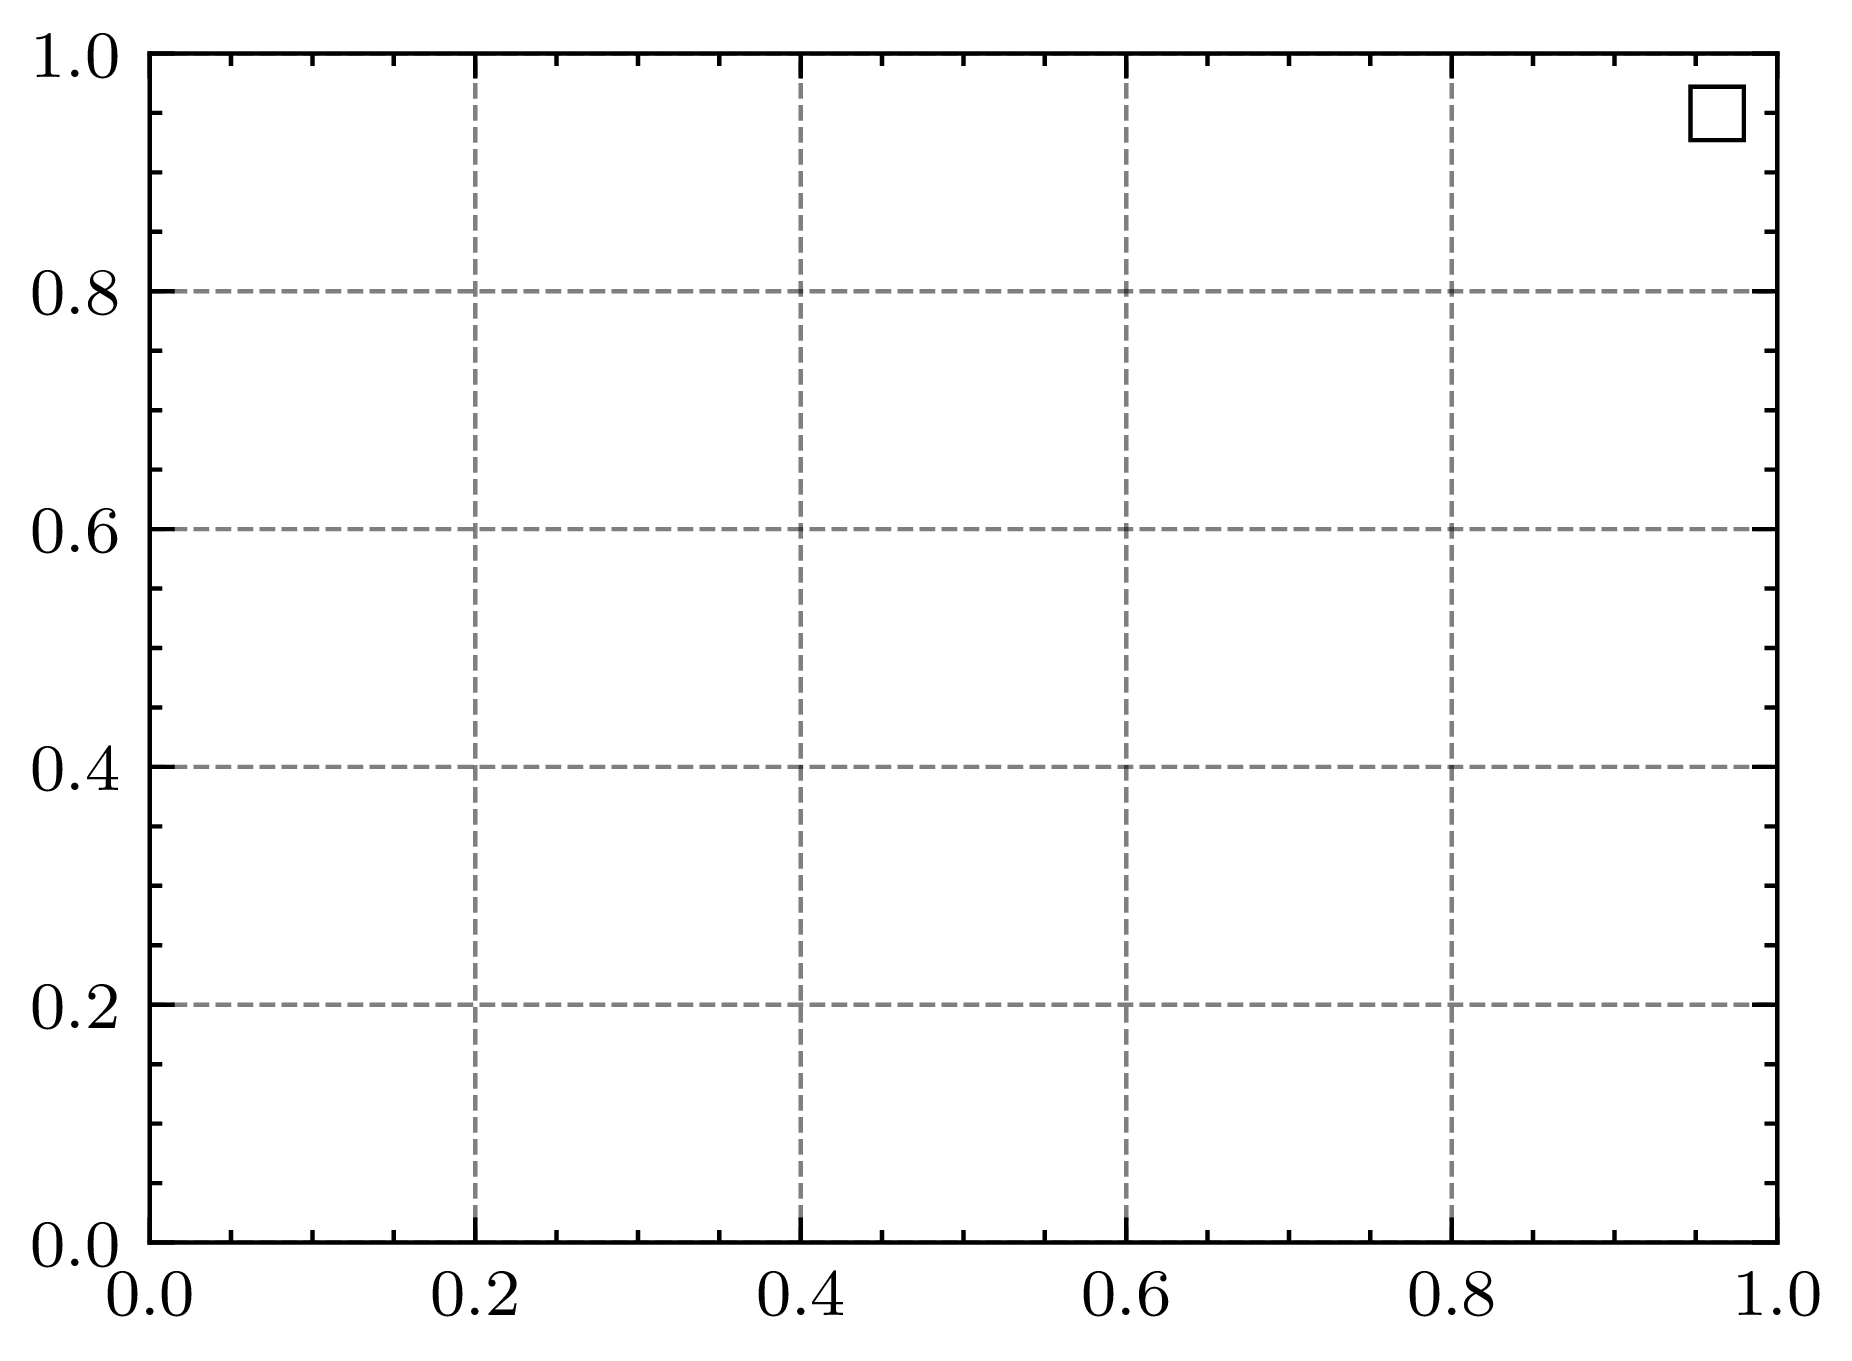

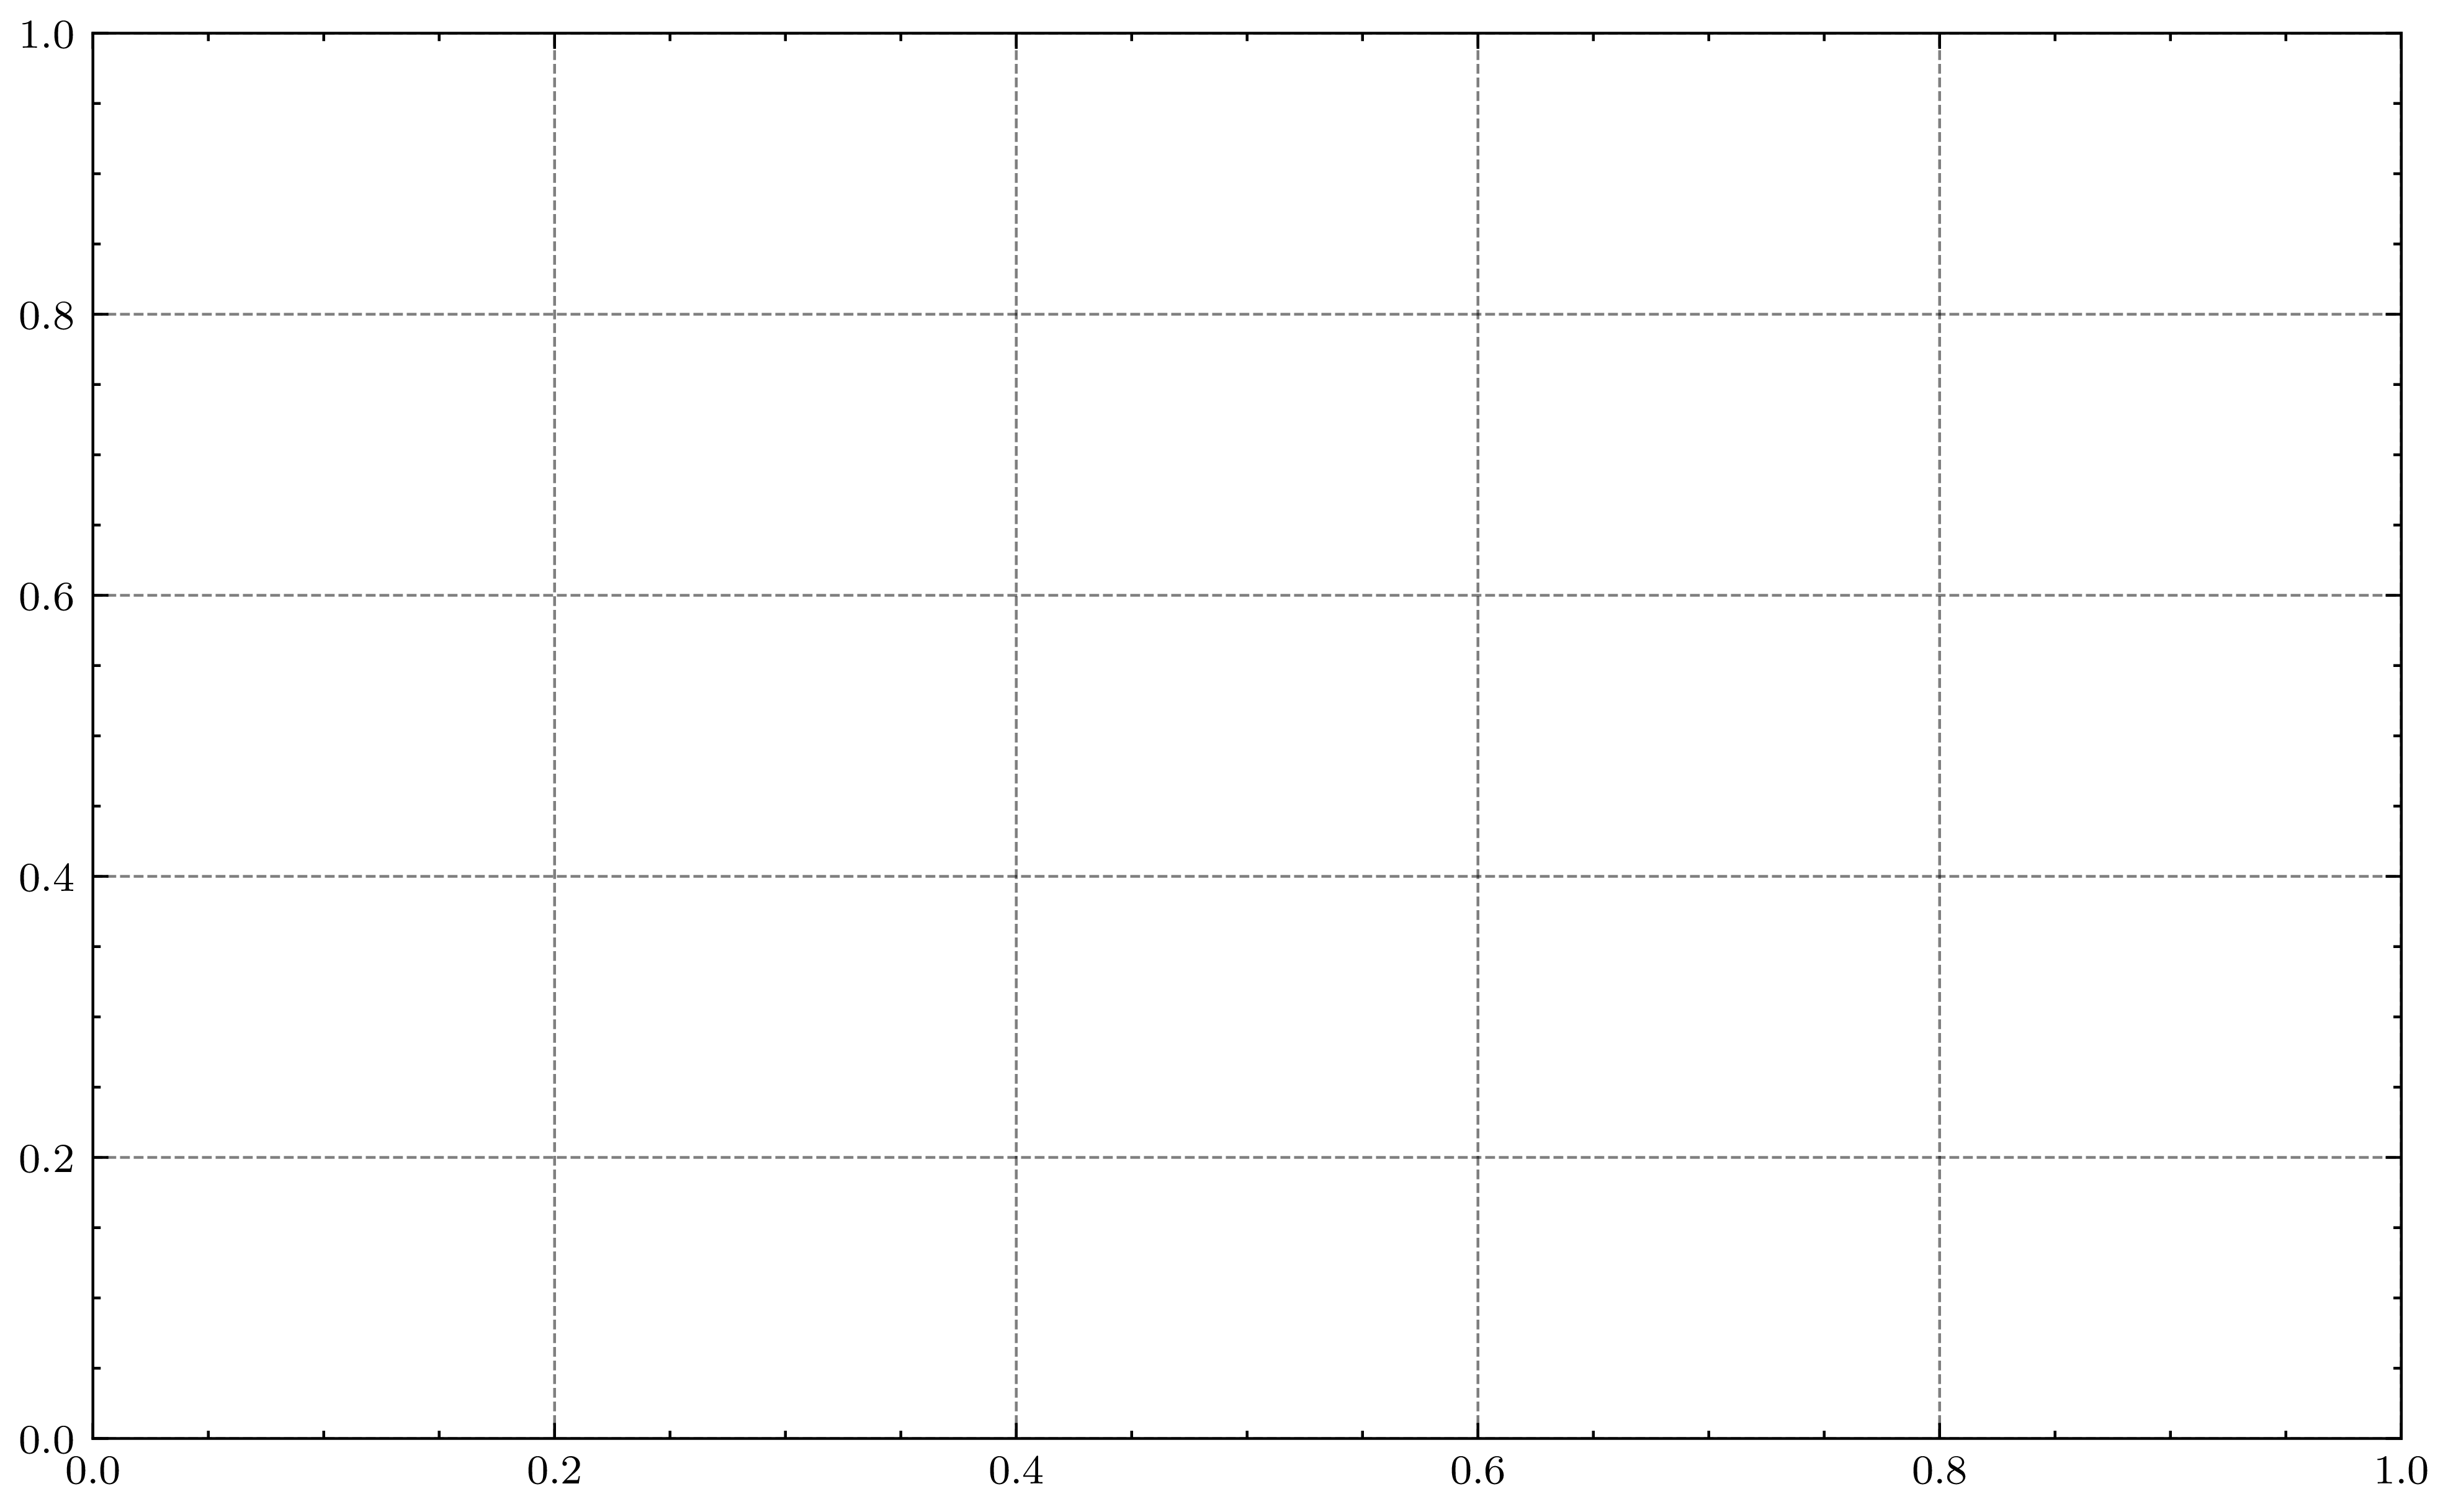

In [ ]:


matplotlib.use("pgf")
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
legend = plt.legend(fancybox=False, edgecolor="black")
legend.get_frame().set_linewidth(0.5)

#show duration breakdown of different phases
    
width = 1.5 # the width# of the bars: can also be len(x) sequence
#label = ["Access Control Process Duration"]
fig, ax = plt.subplots(figsize=[8, 5])

ax.bar( metric_dict[0], width, yerr=None,
       bottom=None,
       label=metric_dict[converter[0]])

ax.bar(label, metric_dict[1], width, yerr=None,
       bottom=metric_dict[0],
       label=metric_dict[converter[1]])
       
ax.bar(label, metric_dict[2], width, yerr=None,
       bottom=metric_dict[1],
       label=metric_dict[converter[2]])

ax.bar(label, metric_dict[3], width, yerr=None,
       bottom=metric_dict[2],
       label=metric_dict[converter[3]])

ax.set_ylabel('Time (s)')
#ax.set_xlim(-3, 8)
handles, labels = ax.get_legend_handles_labels()
# ax.set_title('Implementation performance depending on Access Control Policies')
#plt.grid(linestyle='--', linewidth=1, axis='y', alpha=0.7)



textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
fig = plt.figure(figsize=(width, height))
plt.show()
plt.savefig('figures/plot3.png', dpi=300)



